# <font color= 'blue'>Intro to Machine Learning
# <font color='blue'> Homework 3 </font>

## <font color= 'blue'> Trees & Ensemble Methods
Mehek Niwas || MTH 4224 Spring 2024

#  <font color= 'blue'> Heart Disease Classification

# Dataset Preprocressing & Preparation

In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo
# fetch dataset
heart_disease = fetch_ucirepo(id=45)
# data (as pandas dataframes)
x = heart_disease.data.features # --> unstandardized
y = heart_disease.data.targets
print("Original inputs: ", x.shape)
print("Original outputs: ", y.shape)
# metadata
print(heart_disease.metadata)
# variable information
print(heart_disease.variables)
# store some variable info
rows_list = heart_disease.variables.name.tolist()


Original inputs:  (303, 13)
Original outputs:  (303, 1)
{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, 

In [ ]:
type(y)
print(rows_list)

['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']


In [ ]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
data = pd.read_csv("https://archive.ics.uci.edu/static/public/45/data.csv")
data.dropna(inplace=True)

Y = data.pop('num')
# switch targets to 0 or 1 (binary)
Y.loc[Y.isin([1, 2, 3, 4])] = 1

print("Features: ")
print(data.head()); print("")
print("Standardizing Features...")
scaler = MinMaxScaler()
X = scaler.fit_transform(data.to_numpy())
features_list = rows_list[:-1]
print(X, "\n")
print("Targets: ")
Y = Y.to_numpy()
print(Y, '\n')
print("Features Shape: ", data.shape)
print("Targets Shape: ", Y.shape); print("")
#X = pd.DataFrame(X, columns=features_list)

Features: 
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

    ca  thal  
0  0.0   6.0  
1  3.0   3.0  
2  2.0   7.0  
3  0.0   3.0  
4  0.0   3.0  

Standardizing Features...
[[0.70833333 1.         0.         ... 1.         0.         0.75      ]
 [0.79166667 1.         1.         ... 0.5        1.         0.        ]
 [0.79166667 1.         1.         ... 0.5        0.66666667 1.        ]
 ...
 [0.8125     1.         1.         ... 0.5        0.66666667 1.        ]
 [0.58333333 1.         1.         ... 0.5        0.33333333 1.        ]
 [0.58333333 0.

<ipython-input-4-b44f2153b489>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y.loc[Y.isin([1, 2, 3, 4])] = 1


In [ ]:
import sklearn
from sklearn.model_selection import train_test_split


# randomly split into training and testing sets
trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.2, random_state=42)
print("Training set: ", trainX.shape, trainY.shape)
print("Testing set: ", testX.shape, testY.shape)

Training set:  (237, 13) (237,)
Testing set:  (60, 13) (60,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay # SYNTAX: (true labels, predicted labels)
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

def get_metrics(model, dataX, dataY, u_str):
  # predict labels
  predicted = model.predict(dataX)
  # print quality metrics
  print(u_str, "Classification Report:\n\n", classification_report(dataY, predicted))
  print()

  cm = confusion_matrix(dataY, predicted)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Absence", "Presence"]) # display labels are set from 0 to n-1
  disp.plot()
  disp.ax_.set_title(u_str + " Dataset Confusion Matrix")

# Problem 1
*Use pairplots to analyze the feature distributions and output labels. Note any strong patterns you observe.*

The distribution for age is from around age 30 to 70, with most around age 30-40. For a lot of the medical metrics, it seems like most are around the lower range of the spectrum, and the distribution seems to have bimodal peaks. In binary class labeling, the dataset seems to be quite balanced.

In [ ]:
print(f'Avg class probability in train:   {trainY.mean():.4f}')
print(f'Avg class probability in test:    {testY.mean():.4f}')

Avg class probability in train:   0.4768
Avg class probability in test:    0.4000


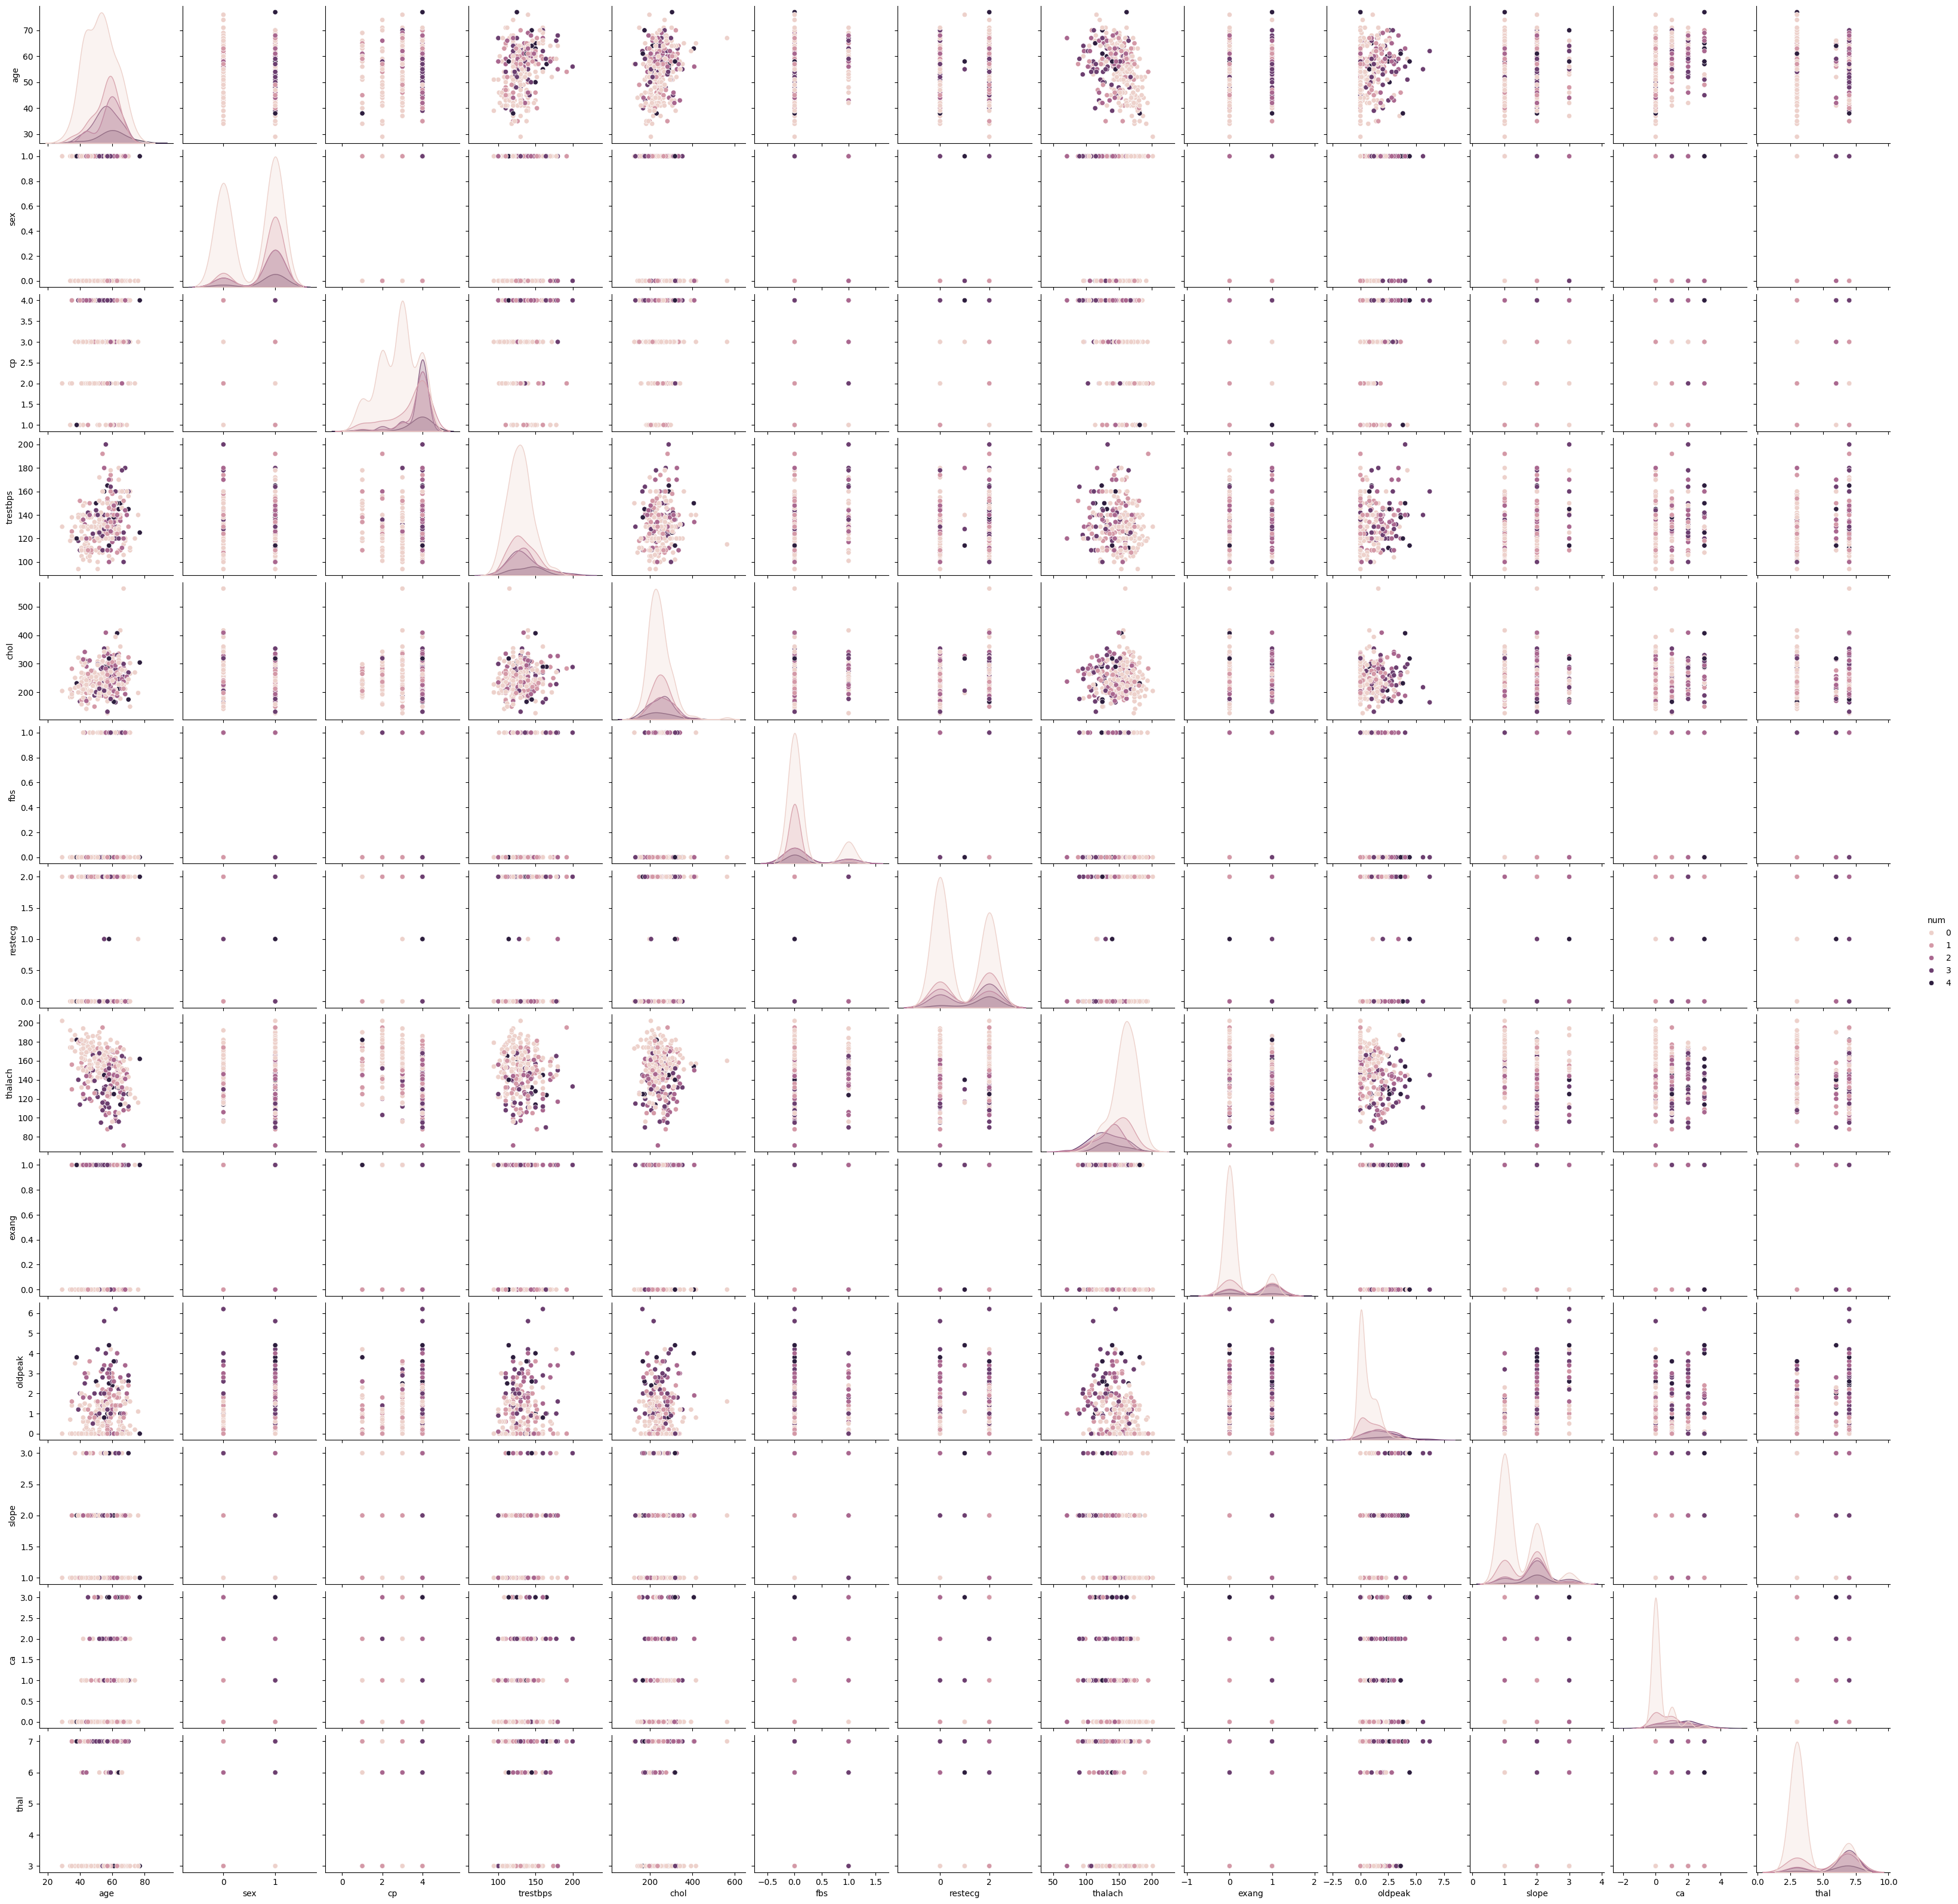

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# combine x and y into single df
data = pd.concat([x, y], axis=1) # -> unstandardized
data.dropna(inplace=True)

# plot pairplot
sns.pairplot(data, hue=data.columns[-1])
plt.show()

# Problem 2
*Do a comparison of the naive Bayes' classifier, logistic regression, LDA, QDA, and K-nearest neighbors on the same train/test split.*

Preprocressed feature variables by standardizing. Converted ordinal targets into binary (absense or presence).
Train_test_split dataset into 80% and 20% sets. Used sklearn defaults for all models to be able to compare. **Note: Interpreted homework problem as not requiring validation set, especially since the dataset itself is very small**

Not sure why test macro accuracy is sometimes more than training macro accuracy. Checked all functions and dataset but did not find any possible issues. It is possible that the dataset splits are too small, allowing test data split to sometimes perform better.

Best two classifiers were Logistic Regression and QDA. Train (85%). Test (90%, 93%). F1 scores for class 0 and 1 were quite similar (0.86 - 0.84).

## Naive Baye's Classifier
#### Training macro acc = 81%, Test macro acc = 88%
Used Bernoulli Naive Baye's Classifier since targets are binary.
Around same precision as Logistic Regression model.

In [ ]:
from sklearn.naive_bayes import BernoulliNB

bayes_model = BernoulliNB()
bayes_model.get_params()
print("Fitting the model...")
model = bayes_model.fit(trainX, trainY)

Fitting the model...


Training Classification Report:

               precision    recall  f1-score   support

           0       0.81      0.82      0.82       124
           1       0.80      0.79      0.79       113

    accuracy                           0.81       237
   macro avg       0.81      0.81      0.81       237
weighted avg       0.81      0.81      0.81       237




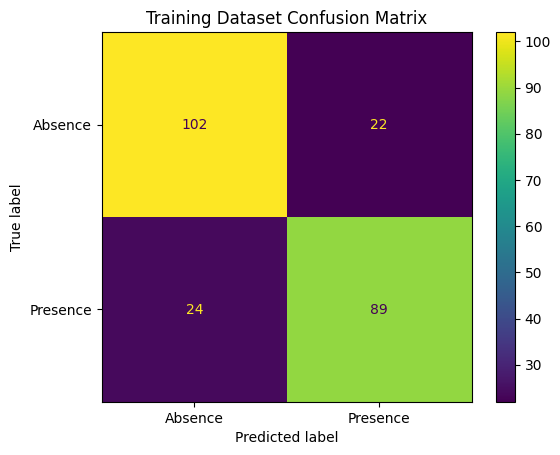

In [ ]:
get_metrics(bayes_model, trainX, trainY, "Training")

Test Classification Report:

               precision    recall  f1-score   support

           0       0.91      0.89      0.90        36
           1       0.84      0.88      0.86        24

    accuracy                           0.88        60
   macro avg       0.88      0.88      0.88        60
weighted avg       0.88      0.88      0.88        60




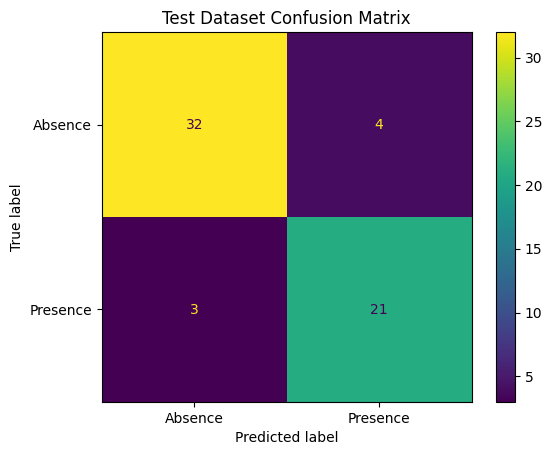

In [ ]:
get_metrics(bayes_model, testX, testY, "Test")

## Logistic Regression
#### Training macro acc = 83%, Test macro acc = 90%
precision is lower than recall (more false positives)

In [ ]:
from sklearn.linear_model import LogisticRegression

# train
log_model = LogisticRegression()
log_model.get_params()
print("Fitting the model...")
log_model.fit(trainX, trainY)

Fitting the model...


LogisticRegression()

Training Classification Report:

               precision    recall  f1-score   support

           0       0.82      0.87      0.85       124
           1       0.85      0.80      0.82       113

    accuracy                           0.84       237
   macro avg       0.84      0.83      0.83       237
weighted avg       0.84      0.84      0.84       237




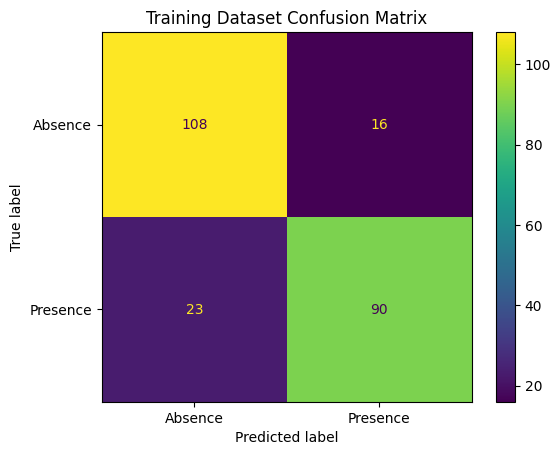

In [ ]:
get_metrics(log_model, trainX, trainY, "Training")

Test Classification Report:

               precision    recall  f1-score   support

           0       0.94      0.89      0.91        36
           1       0.85      0.92      0.88        24

    accuracy                           0.90        60
   macro avg       0.89      0.90      0.90        60
weighted avg       0.90      0.90      0.90        60




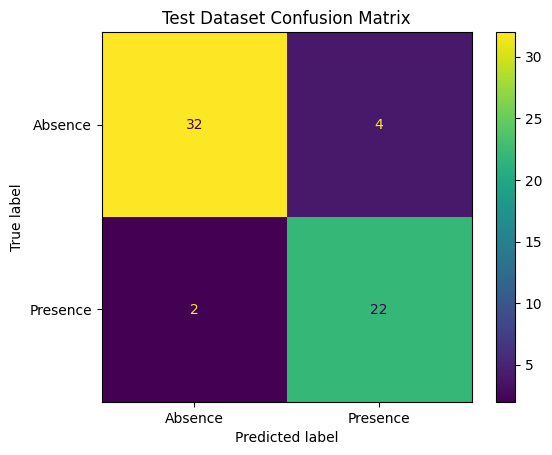

In [ ]:
get_metrics(log_model, testX, testY, "Test")

## LDA
#### Training macro acc = 85%, Test macro acc = 88%
Higher precision than other models (0.87)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda_model = LinearDiscriminantAnalysis()
lda_model.get_params()
print("Fitting the model...")
lda_model.fit(trainX, trainY)

Fitting the model...


LinearDiscriminantAnalysis()

Training Classification Report:

               precision    recall  f1-score   support

           0       0.83      0.90      0.86       124
           1       0.87      0.80      0.83       113

    accuracy                           0.85       237
   macro avg       0.85      0.85      0.85       237
weighted avg       0.85      0.85      0.85       237




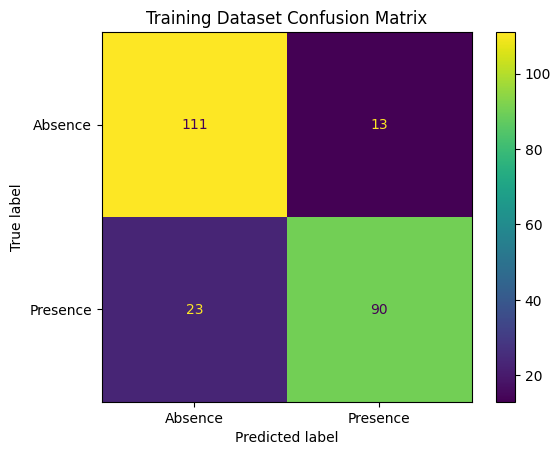

In [ ]:
get_metrics(lda_model, trainX, trainY, "Training")

Test Classification Report:

               precision    recall  f1-score   support

           0       0.89      0.92      0.90        36
           1       0.87      0.83      0.85        24

    accuracy                           0.88        60
   macro avg       0.88      0.88      0.88        60
weighted avg       0.88      0.88      0.88        60




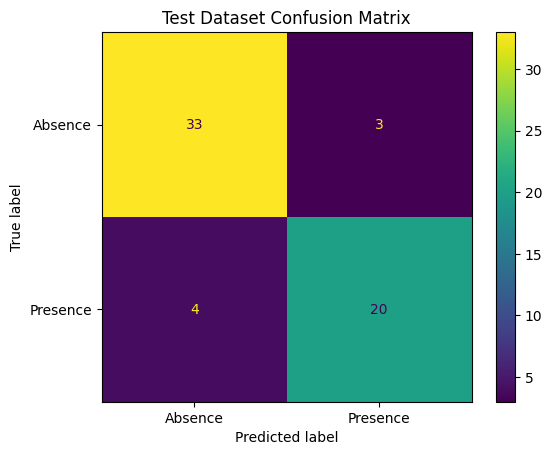

In [ ]:
get_metrics(lda_model, testX, testY, "Test")

## QDA
#### Training macro acc = 85%, Test macro acc = 93%

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda_model = QuadraticDiscriminantAnalysis()
qda_model.get_params()
print("Fitting the model...")
qda_model.fit(trainX, trainY)

Fitting the model...


QuadraticDiscriminantAnalysis()

Training Classification Report:

               precision    recall  f1-score   support

           0       0.86      0.86      0.86       124
           1       0.85      0.84      0.84       113

    accuracy                           0.85       237
   macro avg       0.85      0.85      0.85       237
weighted avg       0.85      0.85      0.85       237




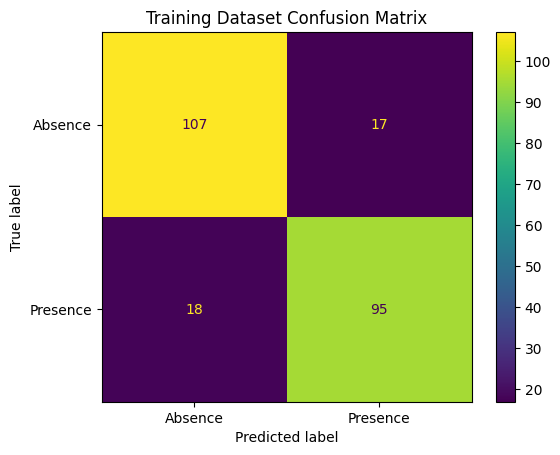

In [ ]:
get_metrics(qda_model, trainX, trainY, "Training")

Test Classification Report:

               precision    recall  f1-score   support

           0       0.92      0.97      0.95        36
           1       0.95      0.88      0.91        24

    accuracy                           0.93        60
   macro avg       0.94      0.92      0.93        60
weighted avg       0.93      0.93      0.93        60




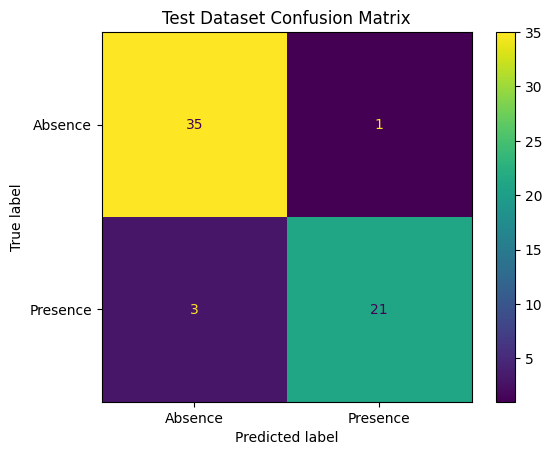

In [ ]:
get_metrics(qda_model, testX, testY, "Test")

## KNN
#### Training macro acc = 85%, Test macro acc = 84%

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.get_params()
print("Fitting the model...")
knn_model.fit(trainX, trainY)

Fitting the model...


KNeighborsClassifier()

Training Classification Report:

               precision    recall  f1-score   support

           0       0.85      0.85      0.85       124
           1       0.84      0.84      0.84       113

    accuracy                           0.85       237
   macro avg       0.85      0.85      0.85       237
weighted avg       0.85      0.85      0.85       237




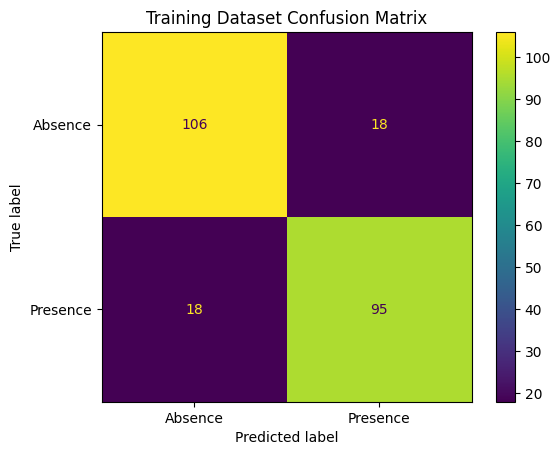

In [ ]:
get_metrics(knn_model, trainX, trainY, "Training")

Test Classification Report:

               precision    recall  f1-score   support

           0       0.86      0.89      0.88        36
           1       0.83      0.79      0.81        24

    accuracy                           0.85        60
   macro avg       0.85      0.84      0.84        60
weighted avg       0.85      0.85      0.85        60




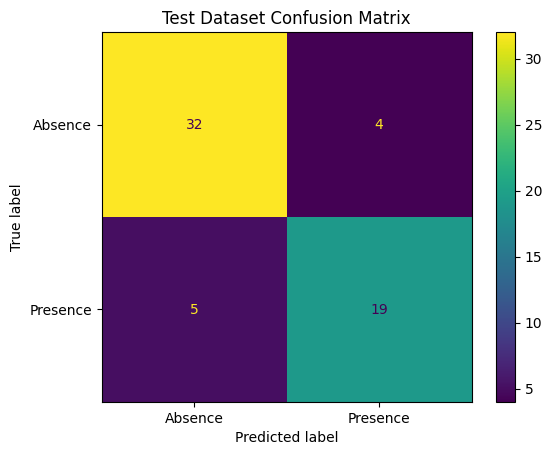

In [ ]:
get_metrics(knn_model, testX, testY, "Test")

# Problem 3
*Train a decision tree classifier to classify which people have heart disease and test it on a test set.*

100% training macro accuracy, 74% test macro accuracy. Decision tree is severly overfitting (pruning in next problem)

Fitting the model...


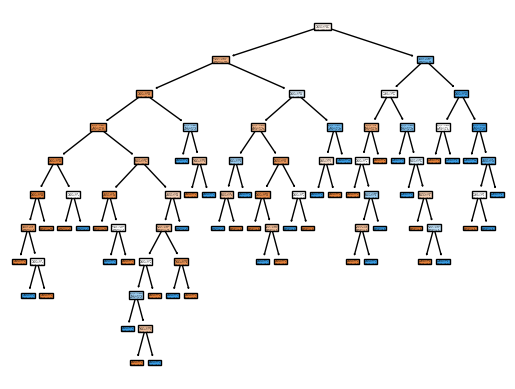

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

tree_model = DecisionTreeClassifier()
tree_model.get_params()
print("Fitting the model...")
tree_model.fit(trainX, trainY)
# plot the decision tree
plot_tree(tree_model, filled=True)
plt.show()

Training Classification Report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       124
           1       1.00      1.00      1.00       113

    accuracy                           1.00       237
   macro avg       1.00      1.00      1.00       237
weighted avg       1.00      1.00      1.00       237




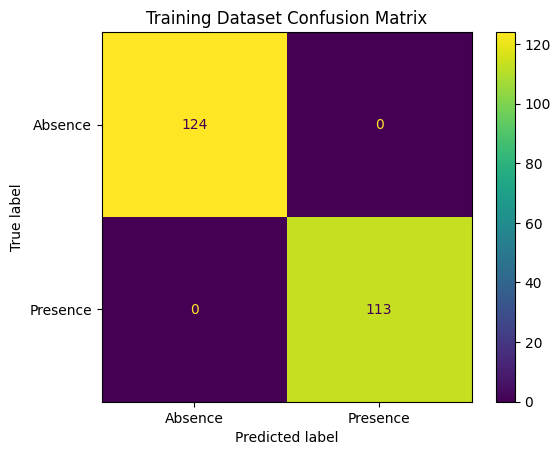

In [ ]:
get_metrics(tree_model, trainX, trainY, "Training")

Test Classification Report:

               precision    recall  f1-score   support

           0       0.82      0.75      0.78        36
           1       0.67      0.75      0.71        24

    accuracy                           0.75        60
   macro avg       0.74      0.75      0.74        60
weighted avg       0.76      0.75      0.75        60




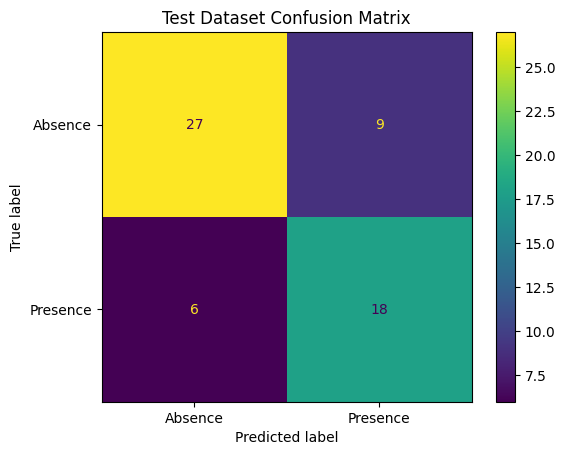

In [ ]:
get_metrics(tree_model, testX, testY, "Test")

# Problem 4
*Use cost-complexity pruning to simplify your tree as much as possible to maintain high validation accuracy and plot tree diagrams. Discuss what is intuitive (or not intuitive) about the trained model's decisionmaking process.*

Majority of code for graphing and calculation for cost complexity pruning taken from github + sklearn. https://github.com/rtwhite1546/Spring-2024-Intro-to-Machine-Learning/blob/main/Week-8-Pruning-Trees-Random-Forests/Week-8.ipynb

Based on Fig 4. from graphs, decided to use alpha = 0.017 for pruning. Results of pruned tree: Train macro acc (81%), Test macro acc (86%)

The plot tree (Fig. 5) seems somewhat intuitive. The tree first seperates by ```x[11]```, which is the number of colored major vessels by flouroscopy. The color from flouroscopy indicates blood flow, so it would make sense that the first seperation depends on blood flow and may indicate possible blockages caused by heart diease. The next split is with ```x[12]``` and ```x[2]```. ```x[12]``` indicates normal, fixed defect, or reversable defect, which also might make sense for heart diease, but it was difficult to figure out the meaning of "defect" from the dataset documentation. ```x[2]``` indicated the chest pain type, which definitely makes sense in determining the cause of someone's pain and whether they may have heart disease or not.

Overall, the plot tree seems to have a reasonable logic, showing how helpful it is to use decision tree classifers to explain medical predictions.


Fitting the model...


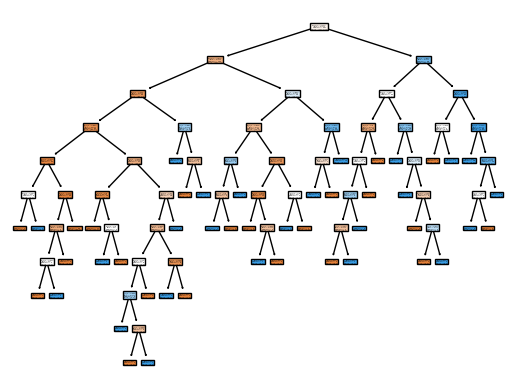

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

tree_model = DecisionTreeClassifier()
tree_model.get_params()
print("Fitting the model...")
tree_model.fit(trainX, trainY)
# plot the decision tree
plot_tree(tree_model, filled=True)
plt.show()

Text(0.5, 1.0, 'Fig. 1: Total Impurity vs effective alpha for training set')

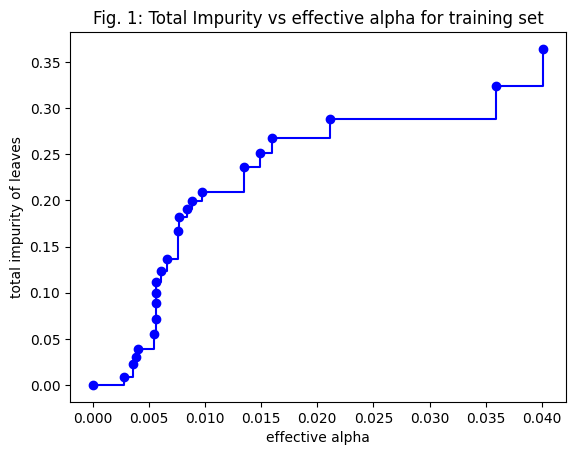

In [ ]:
# do cost-complexity pruning
path = tree_model.cost_complexity_pruning_path(trainX, trainY)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# plotting the impurities for different alphas
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post", color = 'blue')
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Fig. 1: Total Impurity vs effective alpha for training set")

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(trainX, trainY)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.13456627743791189


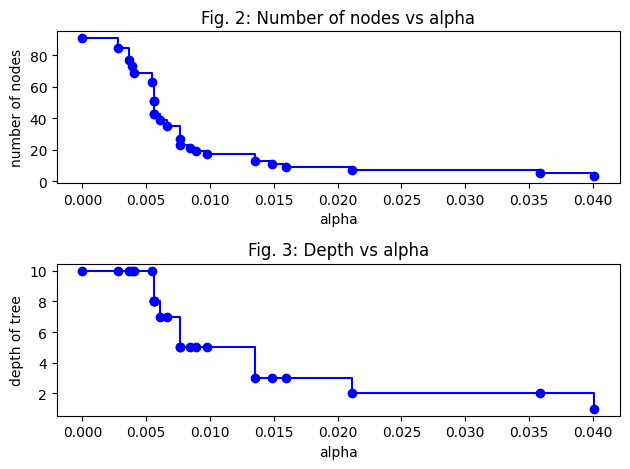

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post", color = 'blue')
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Fig. 2: Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post", color = 'blue')
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Fig. 3: Depth vs alpha")
fig.tight_layout()

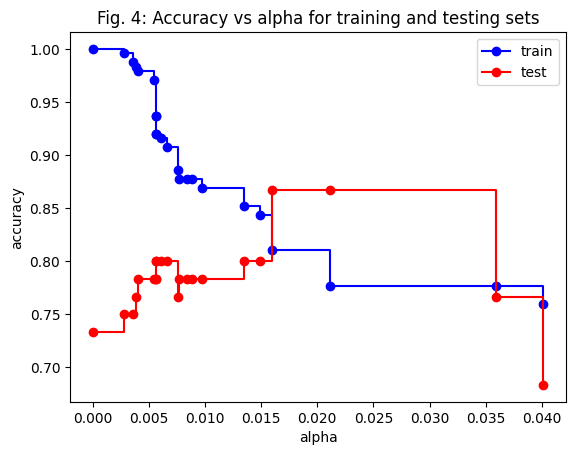

In [ ]:
train_scores = [clf.score(trainX, trainY) for clf in clfs]
test_scores = [clf.score(testX, testY) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Fig. 4: Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post", color = 'blue')
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post", color = 'red')
ax.legend()
plt.show()

Fitting the model... 



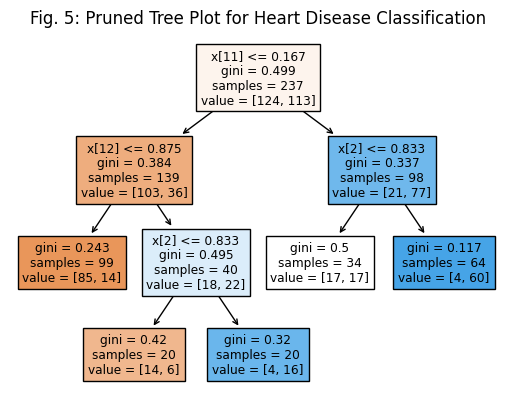

In [ ]:
# with pruning
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

pruned_model = DecisionTreeClassifier(ccp_alpha=0.017)
pruned_model.get_params()
print("Fitting the model... \n")
pruned_model.fit(trainX, trainY)
# plot the decision tree
plot_tree(pruned_model, filled=True)
plt.title("Fig. 5: Pruned Tree Plot for Heart Disease Classification")
plt.show()


Training Classification Report:

               precision    recall  f1-score   support

           0       0.76      0.94      0.84       124
           1       0.90      0.67      0.77       113

    accuracy                           0.81       237
   macro avg       0.83      0.80      0.80       237
weighted avg       0.83      0.81      0.81       237




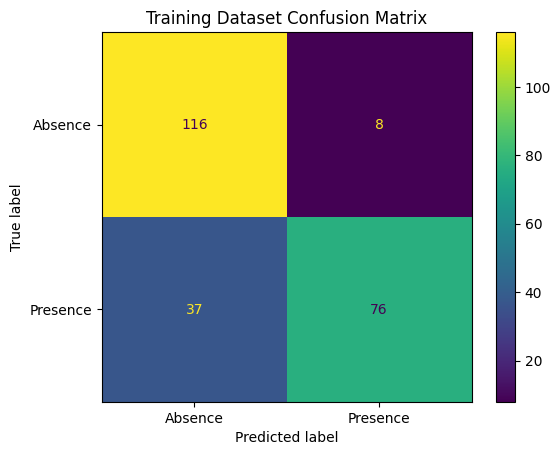

In [ ]:
get_metrics(pruned_model, trainX, trainY, "Training")

Test Classification Report:

               precision    recall  f1-score   support

           0       0.85      0.94      0.89        36
           1       0.90      0.75      0.82        24

    accuracy                           0.87        60
   macro avg       0.88      0.85      0.86        60
weighted avg       0.87      0.87      0.86        60




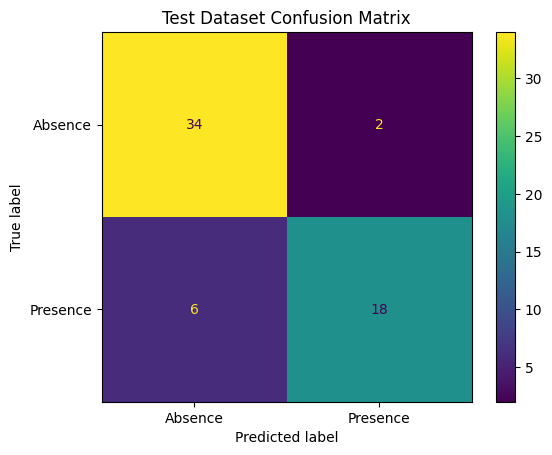

In [ ]:
get_metrics(pruned_model, testX, testY, "Test")